In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Grazie Lowrenzo for Data Preparation

## <3 <3 <3

In [2]:
df = pd.read_csv("kids_train_cleaned.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

RefId  IsBadBuy   PurchDate  Auction  VehYear  VehicleAge      Make  \
0    326         1  10/25/2010    ADESA   2008.0         2.0       KIA   
1  42991         0   5/27/2009  MANHEIM   2006.0         3.0  CHRYSLER   
2  55273         0   3/18/2010    OTHER   2008.0         2.0  CHRYSLER   
3  29058         0    6/8/2009    OTHER   2005.0         4.0      FORD   
4  34991         0    3/4/2009  MANHEIM   2005.0         4.0  CHRYSLER   

              Model Trim SubModel  ... PurchMonth PurchDay PurchWeekDay  \
0           SPECTRA   EX    SEDAN  ...       10.0     25.0       Monday   
1           STRATUS  SXT    SEDAN  ...        5.0     27.0    Wednesday   
2           CALIBER   SE    WAGON  ...        3.0     18.0     Thursday   
3          FREESTAR    S  MINIVAN  ...        6.0      8.0       Monday   
4  TOWN & COUNTRY V  Bas  MINIVAN  ...        3.0      4.0    Wednesday   

   EngineLiters NumCylinders  4X4  WheelDrive  NumDoors         PCA1  \
0       4.11398          5.0    0           0       4.0  1797.080405   
1       2.70000          6.0    0           0       4.0 -4879.356480   
2       2.31289          6.0    0           0       4.0  4349.541129   
3       3.90000          6.0   NO       Front       5.0 -5514.286888   
4       3.30000          4.0   NO       Front       5.0 -4594.389176   

          PCA2  
0  -753.566708  
1  1637.798453  
2  -467.358818  
3  1633.449461  
4  1693.004506  

[5 rows x 38 columns]

In [3]:
for e in df.columns:
    print(e)

RefId
IsBadBuy
PurchDate
Auction
VehYear
VehicleAge
Make
Model
Trim
SubModel
Color
Transmission
WheelType
VehOdo
Nationality
AAAP
AACP
ARAP
ARCP
CAAP
CACP
CRAP
CRCP
BYRNO
VNST
VehBCost
WarrantyCost
PurchYear
PurchMonth
PurchDay
PurchWeekDay
EngineLiters
NumCylinders
4X4
WheelDrive
NumDoors
PCA1
PCA2


In [4]:
categories = ['Model', 'Make', 'Trim', 'BYRNO', 'WheelType', 'Color', 'VNST']

not_cat = ['VehOdo', 'VehBCost', 'WarrantyCost', 'AAAP', 'VehicleAge']

to_drop = ['AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 'CRAP', 'CRCP', 'NumCylinders', '4X4', 'WheelDrive',
           'NumDoors', 'PCA1', 'PCA2', 'RefId', 'PurchDate', 'PurchYear', 'PurchMonth',
            'PurchDay', 'VehYear', 'EngineLiters', 'Auction', 'PurchWeekDay','IsBadBuy',
'Transmission', 'Nationality','SubModel']

In [5]:
df.drop(columns= to_drop, axis=1, inplace=True) 

In [6]:
df.head()

VehicleAge      Make             Model Trim   Color WheelType  VehOdo  \
0         2.0       KIA           SPECTRA   EX    BLUE    Covers   61184   
1         3.0  CHRYSLER           STRATUS  SXT  SILVER    Covers   92383   
2         2.0  CHRYSLER           CALIBER   SE   BLACK    Covers   45965   
3         4.0      FORD          FREESTAR    S   BROWN    Covers   80169   
4         4.0  CHRYSLER  TOWN & COUNTRY V  Bas    BLUE     Alloy   77372   

     AAAP  BYRNO VNST  VehBCost  WarrantyCost  
0  6796.0   5546   FL    6100.0           533  
1  5480.0  99750   FL    4000.0          1630  
2  8067.0  99761   OK    7500.0           693  
3  4817.0  99761   AZ    4725.0          1633  
4  5430.0  20833   TX    5670.0          1623

In [7]:
df['WheelType'].fillna('Unknown', inplace=True)

In [8]:
for col in categories:
    df[col] = df[col].astype('category')
    
df['VehicleAge'] = df['VehicleAge'].astype('int')

In [9]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Series([], dtype: int64)

## Binning

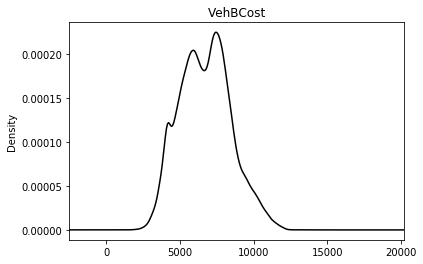

In [10]:
x = plt.xlim((-2500, 20200))
plt.title('VehBCost')
df["VehBCost"].plot.kde(x = 'x', color = 'black') 

In [11]:
bins = [df.VehBCost.min() - 1,5000, 7000, 8000, 10000, df.VehBCost.max()]

df['VehBCost'] = pd.cut(df['VehBCost'], bins)

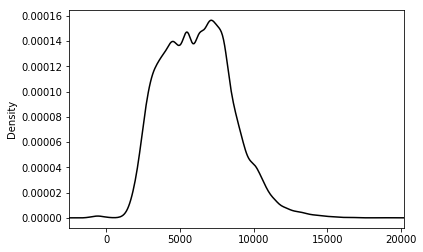

In [12]:
x = plt.xlim((-2500, 20200))
df["AAAP"].plot.kde(x = 'x', color = 'black') 

In [13]:
bins = [df.AAAP.min() - 1, 3000, 6000, 8000, 10000, df.AAAP.max()]

df['AAAP'] = pd.cut(df['AAAP'], bins)

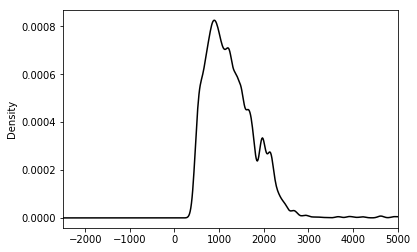

In [14]:
x = plt.xlim((-2500, 5000))
df["WarrantyCost"].plot.kde(x = 'x', color = 'black') 

In [15]:
bins = [df.WarrantyCost.min() - 1,700, 1200, 1800, 2600, df.WarrantyCost.max()]

df['WarrantyCost'] = pd.cut(df['WarrantyCost'], bins)

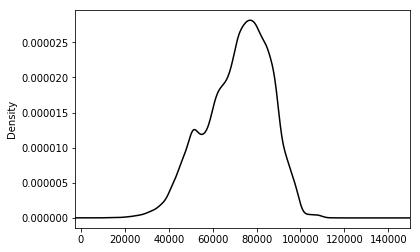

In [16]:
x = plt.xlim((-2500, 150000))
df["VehOdo"].plot.kde(x = 'x', color = 'black') 

In [17]:
bins = [df.VehOdo.min() - 1,40000, 60000, 80000, 100000, df.VehOdo.max()]

df['VehOdo'] = pd.cut(df['VehOdo'], bins)

In [18]:
df['VehicleAge'] = pd.cut(df['VehicleAge'], [0, 2, 4, 6, 8, 10], right=False)

Remapping Values

In [19]:
df.head()

VehicleAge      Make             Model Trim   Color WheelType  \
0     [2, 4)       KIA           SPECTRA   EX    BLUE    Covers   
1     [2, 4)  CHRYSLER           STRATUS  SXT  SILVER    Covers   
2     [2, 4)  CHRYSLER           CALIBER   SE   BLACK    Covers   
3     [4, 6)      FORD          FREESTAR    S   BROWN    Covers   
4     [4, 6)  CHRYSLER  TOWN & COUNTRY V  Bas    BLUE     Alloy   

            VehOdo               AAAP  BYRNO VNST          VehBCost  \
0   (60000, 80000]   (6000.0, 8000.0]   5546   FL  (5000.0, 7000.0]   
1  (80000, 100000]   (3000.0, 6000.0]  99750   FL   (224.0, 5000.0]   
2   (40000, 60000]  (8000.0, 10000.0]  99761   OK  (7000.0, 8000.0]   
3  (80000, 100000]   (3000.0, 6000.0]  99761   AZ   (224.0, 5000.0]   
4   (60000, 80000]   (3000.0, 6000.0]  20833   TX  (5000.0, 7000.0]   

   WarrantyCost  
0    (461, 700]  
1  (1200, 1800]  
2    (461, 700]  
3  (1200, 1800]  
4  (1200, 1800]

In [20]:
df['VehicleAge'] = 'Age:' + df['VehicleAge'].astype(str)
df['VehOdo'] = 'Odo:' + df['VehOdo'].astype(str)
df['AAAP'] = 'AAAP:' + df['AAAP'].astype(str)
df['WarrantyCost'] = 'WarrCost:' + df['WarrantyCost'].astype(str)
df['VehBCost'] = 'VehBCost:' + df['VehBCost'].astype(str)

#df['BuyStatus'] = df['IsBadBuy'].map(
    #{0: 'GoodBuy', 1: 'BadBuy'}).astype(str)
#df.drop(columns=['IsBadBuy'], inplace=True)


In [21]:
df.head()

VehicleAge      Make             Model Trim   Color WheelType  \
0  Age:[2, 4)       KIA           SPECTRA   EX    BLUE    Covers   
1  Age:[2, 4)  CHRYSLER           STRATUS  SXT  SILVER    Covers   
2  Age:[2, 4)  CHRYSLER           CALIBER   SE   BLACK    Covers   
3  Age:[4, 6)      FORD          FREESTAR    S   BROWN    Covers   
4  Age:[4, 6)  CHRYSLER  TOWN & COUNTRY V  Bas    BLUE     Alloy   

                VehOdo                    AAAP  BYRNO VNST  \
0   Odo:(60000, 80000]   AAAP:(6000.0, 8000.0]   5546   FL   
1  Odo:(80000, 100000]   AAAP:(3000.0, 6000.0]  99750   FL   
2   Odo:(40000, 60000]  AAAP:(8000.0, 10000.0]  99761   OK   
3  Odo:(80000, 100000]   AAAP:(3000.0, 6000.0]  99761   AZ   
4   Odo:(60000, 80000]   AAAP:(3000.0, 6000.0]  20833   TX   

                    VehBCost           WarrantyCost  
0  VehBCost:(5000.0, 7000.0]    WarrCost:(461, 700]  
1   VehBCost:(224.0, 5000.0]  WarrCost:(1200, 1800]  
2  VehBCost:(7000.0, 8000.0]    WarrCost:(461, 700]  
3   VehBCost:(224.0, 5000.0]  WarrCost:(1200, 1800]  
4  VehBCost:(5000.0, 7000.0]  WarrCost:(1200, 1800]

In [22]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Series([], dtype: int64)

In [23]:
len(df[df.WheelType == 'Unknown'])

2575

Sostituzioni per Marta

In [24]:
df['WheelTypeSost'] = df['WheelType']

In [25]:
df['WheelTypeSost'] = np.where((np.logical_and(df['Make'] == 'FORD' ,df['WheelTypeSost'] == 'Unknown')),str('Alloy'), df['WheelTypeSost'])

In [26]:
ppp = np.logical_and(df['VehicleAge'] == 'Age:[2, 4)' ,df['VehBCost'] == 'VehBCost:(5000.0, 7000.0]')

df['WheelTypeSost'] = np.where(np.logical_and(ppp,df['WheelTypeSost'] == 'Unknown'),str('Covers'), df['WheelTypeSost'])

In [27]:
ppp = np.logical_and(df['VehOdo'] == 'Odo:(80000, 100000]' ,df['WarrantyCost'] == 'WarrCost:(1200, 1800]')

df['WheelTypeSost'] = np.where(np.logical_and(ppp,df['WheelTypeSost'] == 'Unknown'),str('Alloy'), df['WheelTypeSost'])

In [28]:
df[df.WheelType != df.WheelTypeSost]

VehicleAge      Make             Model                Trim   Color  \
66      Age:[4, 6)      FORD           MUSTANG                 Bas     RED   
71      Age:[6, 8)        GM       TRAILBLAZER                  LS   WHITE   
124     Age:[4, 6)      FORD             FOCUS                 ZX4  SILVER   
125     Age:[6, 8)      FORD              F150                  XL   WHITE   
145     Age:[2, 4)  CHRYSLER           AVENGER                  SE  SILVER   
165     Age:[6, 8)    NISSAN        PATHFINDER                  LE   BLACK   
315     Age:[4, 6)        GM       TRAILBLAZER                  LS    BLUE   
343     Age:[2, 4)    SUZUKI           FORENZA    38.3446413114107    GREY   
381     Age:[2, 4)      FORD             FOCUS                 ZX4   BEIGE   
496     Age:[4, 6)      FORD          FREESTAR                  SE  SILVER   
498     Age:[6, 8)      FORD             FOCUS                  SE  SILVER   
514     Age:[2, 4)      FORD           MUSTANG                 Bas  SILVER   
515     Age:[4, 6)       GMC             ENVOY                 SLE    GREY   
566     Age:[2, 4)      FORD     RANGER PICKUP                  XL   WHITE   
603     Age:[4, 6)        GM           EQUINOX                  LT    GOLD   
630     Age:[6, 8)      FORD              F150                  XL     RED   
717     Age:[4, 6)        GM            MALIBU                  LS   OTHER   
729     Age:[4, 6)  CHRYSLER        PT CRUISER                 Tou    BLUE   
737     Age:[4, 6)  CHRYSLER        PT CRUISER                 Bas   WHITE   
738     Age:[6, 8)      FORD             FOCUS                 ZTS     RED   
868     Age:[4, 6)  CHRYSLER           CHARGER                 Bas   BLACK   
978     Age:[2, 4)  CHRYSLER        PT CRUISER                 Tou   WHITE   
1012    Age:[4, 6)      FORD            TAURUS                  SE  SILVER   
1027    Age:[4, 6)      FORD           MUSTANG                 Bas    BLUE   
1092    Age:[2, 4)      FORD         FREESTYLE                 SEL    GREY   
1100   Age:[8, 10)      FORD          TOWN CAR                 Exe   WHITE   
1218    Age:[4, 6)      FORD             FOCUS                 ZX4   WHITE   
1245    Age:[2, 4)        GM                G6                 Bas   BLACK   
1287    Age:[2, 4)  CHRYSLER  TOWN & COUNTRY V                 Bas  SILVER   
1333    Age:[6, 8)      FORD              F150                  XL  SILVER   
...            ...       ...               ...                 ...     ...   
56589   Age:[4, 6)      FORD      FIVE HUNDRED                 Bas  PURPLE   
56592   Age:[6, 8)      FORD           CALIBER                  XL    BLUE   
56637   Age:[4, 6)      FORD       TRAILBLAZER                 SXT   WHITE   
56641   Age:[6, 8)      FORD            MALIBU                 XLS    BLUE   
56718  Age:[8, 10)      FORD    1500 SILVERADO                  ST   BLACK   
56724   Age:[6, 8)        GM           SEBRING                 ZX5    BLUE   
56801   Age:[6, 8)  CHRYSLER          FREESTAR                 Bas    BLUE   
56853   Age:[2, 4)      FORD       MONTE CARLO                  LT  SILVER   
57028   Age:[4, 6)      FORD           CALIBER                  SE    GOLD   
57106   Age:[2, 4)       KIA               ION                  LT    GOLD   
57115   Age:[2, 4)      FORD   1500 RAM PICKUP                 Bas    GOLD   
57119   Age:[6, 8)  CHRYSLER           SPECTRA  161.10692567214141  SILVER   
57168   Age:[4, 6)      FORD            IMPALA                 Bas    GOLD   
57184   Age:[2, 4)  CHRYSLER            IMPALA                 SXT  ORANGE   
57213   Age:[2, 4)      FORD        PT CRUISER                  LS  MAROON   
57326   Age:[2, 4)      FORD           CALIBER                  LT   BLACK   
57416   Age:[2, 4)        GM           EQUINOX                  LS    BLUE   
57571   Age:[4, 6)      FORD          UPLANDER                  LS    GREY   
57586   Age:[6, 8)      FORD           EQUINOX                  SE    GREY   
57694   Age:[2, 4)      FORD  

In [29]:
len(df[df.WheelType != df.WheelTypeSost])

935

## Guidelines for the task on Association Rules Mining

-Frequent patterns extraction with different values of support and different types (i.e. frequent, close, maximal), (6 points)

-Discussion of the most interesting frequent patterns and analyze how changes the number of patterns w.r.t. the min_sup parameter (7 points)
    
-Association rules extraction with different values of confidence (6 points)
    
-Discussion of the most interesting rules and analyze how changes the number of rules w.r.t. the min_conf parameter, histogram of rules' confidence and lift (7 points)
    
-Use the most meaningful rules to replace missing values and evaluate the accuracy (2 points)

-Use the most meaningful rules to predict the target variable and evaluate the accuracy (2 points)

## APRIORI

In [30]:
from fim import apriori

In [31]:
#in questo modo creiamo i baskets, cioé selezioniamo gli attributi per ogni riga corrispondente
baskets = df.values.tolist()

In [63]:
results = []
for support in range(1, 12):
    for confidence in range(70, 60, -1):
        itemsets = apriori(baskets, supp=support, zmin=3, target='r', conf=confidence, report='ascl')
        for e in itemsets: 
            print(e)
            results.append({
                'supp': e[2],
                'conf': e[4],
                'lift': e[5]
            })
    print(support)
            
results[0:5]


('FORD', ('FIVE HUNDRED', 'Alloy'), 556, 0.009523157029323102, 0.864696734059098, 5.141506683094651)
('WarrCost:(1200, 1800]', ('FIVE HUNDRED', 'Alloy'), 522, 0.008940805700191833, 0.8118195956454122, 2.445932256794393)
('LS', ('UPLANDER', 'GM'), 464, 0.007947382844614962, 0.7483870967741936, 5.330466299629683)
('WarrCost:(1800, 2600]', ('UPLANDER', 'GM'), 532, 0.0091120855028775, 0.8580645161290322, 5.912573906488542)
('Covers', ('UPLANDER', 'GM'), 445, 0.007621951219512195, 0.717741935483871, 1.5664702314414536)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]', 'Covers'), 426, 0.0072965195944094275, 0.7282051282051282, 52.683430241794554)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]'), 495, 0.008478350232940532, 0.7247437774524158, 52.43301202327366)
('SUZUKI', ('FORENZA', 'WarrCost:(461, 700]'), 581, 0.00995135653603727, 0.9509001636661211, 52.27622895996499)
('FORENZA', ('SUZUKI', 'AAAP:(3000.0, 6000.0]', 'Covers'), 426, 0.00729651959440

('Alloy', ('Age:[6, 8)', 'Odo:(80000, 100000]', 'WarrCost:(1200, 1800]', 'AAAP:(3000.0, 6000.0]'), 578, 0.00989997259523157, 0.7585301837270341, 1.5061225087307564)
('Alloy', ('Age:[6, 8)', 'Odo:(80000, 100000]', 'WarrCost:(1200, 1800]'), 1267, 0.021701151000274047, 0.7650966183574879, 1.5191606912727376)
('Alloy', ('Age:[6, 8)', 'Odo:(80000, 100000]', 'VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]'), 632, 0.010824883529734174, 0.7022222222222222, 1.394318535648967)
('AAAP:(3000.0, 6000.0]', ('Age:[6, 8)', 'Odo:(80000, 100000]', 'VehBCost:(5000.0, 7000.0]', 'Alloy'), 632, 0.010824883529734174, 0.8020304568527918, 2.000330906612559)
('AAAP:(3000.0, 6000.0]', ('Age:[6, 8)', 'Odo:(80000, 100000]', 'VehBCost:(5000.0, 7000.0]'), 900, 0.015415182241710058, 0.7751937984496124, 1.9333980404409488)
('AAAP:(3000.0, 6000.0]', ('Age:[6, 8)', 'CHRYSLER', 'VehBCost:(5000.0, 7000.0]'), 727, 0.012452041655248013, 0.7205153617443013, 1.7970254551702032)
('AAAP:(3000.0, 6000.0]', ('Age:[6, 8)', 'Wa

('FORD', ('FIVE HUNDRED', 'Alloy'), 556, 0.009523157029323102, 0.864696734059098, 5.141506683094651)
('WarrCost:(1200, 1800]', ('FIVE HUNDRED', 'Alloy'), 522, 0.008940805700191833, 0.8118195956454122, 2.445932256794393)
('LS', ('UPLANDER', 'GM'), 464, 0.007947382844614962, 0.7483870967741936, 5.330466299629683)
('WarrCost:(1800, 2600]', ('UPLANDER', 'GM'), 532, 0.0091120855028775, 0.8580645161290322, 5.912573906488542)
('Covers', ('UPLANDER', 'GM'), 445, 0.007621951219512195, 0.717741935483871, 1.5664702314414536)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]', 'Covers'), 426, 0.0072965195944094275, 0.7282051282051282, 52.683430241794554)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]'), 495, 0.008478350232940532, 0.7247437774524158, 52.43301202327366)
('SUZUKI', ('FORENZA', 'WarrCost:(461, 700]'), 581, 0.00995135653603727, 0.9509001636661211, 52.27622895996499)
('FORENZA', ('SUZUKI', 'AAAP:(3000.0, 6000.0]', 'Covers'), 426, 0.00729651959440

('Covers', ('LS', 'Age:[2, 4)', 'Odo:(60000, 80000]'), 1487, 0.025469306659358728, 0.7285644292013719, 1.5900903007174647)
('Covers', ('LS', 'Age:[2, 4)'), 2941, 0.05037338996985476, 0.7350662334416396, 1.6042804744965304)
('Odo:(60000, 80000]', ('LS', 'GM', 'WarrCost:(700, 1200]', 'VehBCost:(5000.0, 7000.0]', 'Covers'), 451, 0.007724719101123595, 0.7170111287758346, 1.5356558232739665)
('Covers', ('LS', 'GM', 'WarrCost:(700, 1200]', 'VehBCost:(5000.0, 7000.0]', 'Odo:(60000, 80000]'), 451, 0.007724719101123595, 0.739344262295082, 1.6136172632737493)
('Covers', ('LS', 'GM', 'WarrCost:(700, 1200]', 'VehBCost:(5000.0, 7000.0]'), 629, 0.010773499588928474, 0.733955659276546, 1.60185664876834)
('GM', ('LS', 'WarrCost:(700, 1200]', 'VehBCost:(5000.0, 7000.0]', 'Covers'), 629, 0.010773499588928474, 0.8126614987080103, 2.402837483063328)
('Odo:(60000, 80000]', ('LS', 'GM', 'WarrCost:(700, 1200]', 'VehBCost:(5000.0, 7000.0]'), 610, 0.010448067963825705, 0.7117852975495916, 1.5244634193740043)
(

('FORD', ('FIVE HUNDRED', 'Alloy'), 556, 0.009523157029323102, 0.864696734059098, 5.141506683094651)
('WarrCost:(1200, 1800]', ('FIVE HUNDRED', 'Alloy'), 522, 0.008940805700191833, 0.8118195956454122, 2.445932256794393)
('LS', ('UPLANDER', 'GM'), 464, 0.007947382844614962, 0.7483870967741936, 5.330466299629683)
('WarrCost:(1800, 2600]', ('UPLANDER', 'GM'), 532, 0.0091120855028775, 0.8580645161290322, 5.912573906488542)
('Covers', ('UPLANDER', 'GM'), 445, 0.007621951219512195, 0.717741935483871, 1.5664702314414536)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]', 'Covers'), 426, 0.0072965195944094275, 0.7282051282051282, 52.683430241794554)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]'), 495, 0.008478350232940532, 0.7247437774524158, 52.43301202327366)
('SUZUKI', ('FORENZA', 'WarrCost:(461, 700]'), 581, 0.00995135653603727, 0.9509001636661211, 52.27622895996499)
('FORENZA', ('SUZUKI', 'AAAP:(3000.0, 6000.0]', 'Covers'), 426, 0.00729651959440

('GM', ('LS', 'VehBCost:(7000.0, 8000.0]', 'Age:[2, 4)'), 1173, 0.020091120855028774, 0.8695329873980726, 2.570992299009879)
('Covers', ('LS', 'VehBCost:(7000.0, 8000.0]', 'Age:[2, 4)', 'Odo:(60000, 80000]'), 569, 0.00974582077281447, 0.7647849462365591, 1.669141501292485)
('Age:[2, 4)', ('LS', 'VehBCost:(7000.0, 8000.0]', 'Covers', 'Odo:(60000, 80000]'), 569, 0.00974582077281447, 0.7496706192358367, 2.2477798599766374)
('Covers', ('LS', 'VehBCost:(7000.0, 8000.0]', 'Age:[2, 4)'), 1024, 0.017539051795012334, 0.7590808005930318, 1.6566922156862762)
('Age:[2, 4)', ('LS', 'VehBCost:(7000.0, 8000.0]', 'Covers'), 1024, 0.017539051795012334, 0.7283072546230441, 2.1837248743792013)
('GM', ('LS', 'VehBCost:(7000.0, 8000.0]', 'Age:[4, 6)'), 515, 0.008820909838311866, 0.7996894409937888, 2.364482341891085)
('Covers', ('LS', 'VehBCost:(7000.0, 8000.0]', 'GM', 'Odo:(60000, 80000]'), 698, 0.011955330227459577, 0.6829745596868885, 1.490590508495357)
('GM', ('LS', 'VehBCost:(7000.0, 8000.0]', 'Covers

('FORD', ('FIVE HUNDRED', 'Alloy'), 556, 0.009523157029323102, 0.864696734059098, 5.141506683094651)
('WarrCost:(1200, 1800]', ('FIVE HUNDRED', 'Alloy'), 522, 0.008940805700191833, 0.8118195956454122, 2.445932256794393)
('LS', ('UPLANDER', 'GM'), 464, 0.007947382844614962, 0.7483870967741936, 5.330466299629683)
('WarrCost:(1800, 2600]', ('UPLANDER', 'GM'), 532, 0.0091120855028775, 0.8580645161290322, 5.912573906488542)
('Covers', ('UPLANDER', 'GM'), 445, 0.007621951219512195, 0.717741935483871, 1.5664702314414536)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]', 'Covers'), 426, 0.0072965195944094275, 0.7282051282051282, 52.683430241794554)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]'), 495, 0.008478350232940532, 0.7247437774524158, 52.43301202327366)
('SUZUKI', ('FORENZA', 'WarrCost:(461, 700]'), 581, 0.00995135653603727, 0.9509001636661211, 52.27622895996499)
('FORENZA', ('SUZUKI', 'AAAP:(3000.0, 6000.0]', 'Covers'), 426, 0.00729651959440

('GM', ('LS', 'Odo:(60000, 80000]', 'Alloy'), 1116, 0.01911482597972047, 0.6876155268022182, 2.033107713806376)
('GM', ('LS', 'Odo:(60000, 80000]'), 3178, 0.05443272129350507, 0.7948974487243622, 2.350313615229574)
('GM', ('LS', 'Alloy'), 2340, 0.04007947382844615, 0.688032931490738, 2.0343418754256684)
('Covers', ('LS', 'WarrCost:(700, 1200]', 'VehBCost:(5000.0, 7000.0]', 'Odo:(60000, 80000]'), 494, 0.008461222252671964, 0.6767123287671233, 1.4769232029733366)
('Covers', ('LS', 'WarrCost:(700, 1200]', 'VehBCost:(5000.0, 7000.0]'), 774, 0.013257056727870649, 0.6771653543307087, 1.4779119302921047)
('AAAP:(3000.0, 6000.0]', ('LS', 'VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)'), 750, 0.012845985201425048, 0.6906077348066298, 1.7224333371331657)
('GM', ('BLUE', 'WarrCost:(1800, 2600]'), 787, 0.013479720471362018, 0.6703577512776832, 1.982080773351375)
('Alloy', ('BLUE', 'FORD'), 890, 0.01524390243902439, 0.7883082373782108, 1.565249222251716)
('AAAP:(3000.0, 6000.0]', ('BLUE', 'VehBCost:(224.

('FORD', ('FIVE HUNDRED', 'Alloy'), 556, 0.009523157029323102, 0.864696734059098, 5.141506683094651)
('WarrCost:(1200, 1800]', ('FIVE HUNDRED', 'Alloy'), 522, 0.008940805700191833, 0.8118195956454122, 2.445932256794393)
('LS', ('UPLANDER', 'GM'), 464, 0.007947382844614962, 0.7483870967741936, 5.330466299629683)
('WarrCost:(1800, 2600]', ('UPLANDER', 'GM'), 532, 0.0091120855028775, 0.8580645161290322, 5.912573906488542)
('Covers', ('UPLANDER', 'GM'), 445, 0.007621951219512195, 0.717741935483871, 1.5664702314414536)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]', 'Covers'), 426, 0.0072965195944094275, 0.7282051282051282, 52.683430241794554)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]'), 495, 0.008478350232940532, 0.7247437774524158, 52.43301202327366)
('SUZUKI', ('FORENZA', 'WarrCost:(461, 700]'), 581, 0.00995135653603727, 0.9509001636661211, 52.27622895996499)
('FORENZA', ('SUZUKI', 'Age:[2, 4)'), 388, 0.006645656344203892, 0.6621160409556

('Covers', ('LS', 'VehBCost:(7000.0, 8000.0]', 'Age:[2, 4)', 'GM', 'Odo:(60000, 80000]'), 539, 0.009231981364757468, 0.8068862275449101, 1.761027457253263)
('Age:[2, 4)', ('LS', 'VehBCost:(7000.0, 8000.0]', 'GM', 'Covers', 'Odo:(60000, 80000]'), 539, 0.009231981364757468, 0.7722063037249284, 2.3153498786296334)
('LS', ('VehBCost:(7000.0, 8000.0]', 'Age:[2, 4)', 'GM', 'Covers', 'Odo:(60000, 80000]'), 539, 0.009231981364757468, 0.7092105263157895, 5.051427030428334)
('Covers', ('LS', 'VehBCost:(7000.0, 8000.0]', 'Age:[2, 4)', 'GM'), 942, 0.016134557412989862, 0.80306905370844, 1.7526964835599999)
('GM', ('LS', 'VehBCost:(7000.0, 8000.0]', 'Age:[2, 4)', 'Covers'), 942, 0.016134557412989862, 0.919921875, 2.719979679428745)
('Age:[2, 4)', ('LS', 'VehBCost:(7000.0, 8000.0]', 'GM', 'Covers'), 942, 0.016134557412989862, 0.7548076923076923, 2.263182637001454)
('LS', ('VehBCost:(7000.0, 8000.0]', 'Age:[2, 4)', 'GM', 'Covers'), 942, 0.016134557412989862, 0.6993318485523385, 4.981065102583839)
('G

('FORD', ('FIVE HUNDRED', 'Alloy'), 556, 0.009523157029323102, 0.864696734059098, 5.141506683094651)
('WarrCost:(1200, 1800]', ('FIVE HUNDRED', 'Alloy'), 522, 0.008940805700191833, 0.8118195956454122, 2.445932256794393)
('LS', ('UPLANDER', 'GM'), 464, 0.007947382844614962, 0.7483870967741936, 5.330466299629683)
('WarrCost:(1800, 2600]', ('UPLANDER', 'GM'), 532, 0.0091120855028775, 0.8580645161290322, 5.912573906488542)
('Covers', ('UPLANDER', 'GM'), 445, 0.007621951219512195, 0.717741935483871, 1.5664702314414536)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]', 'Covers'), 426, 0.0072965195944094275, 0.7282051282051282, 52.683430241794554)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]'), 495, 0.008478350232940532, 0.7247437774524158, 52.43301202327366)
('SUZUKI', ('FORENZA', 'WarrCost:(461, 700]'), 581, 0.00995135653603727, 0.9509001636661211, 52.27622895996499)
('FORENZA', ('SUZUKI', 'Age:[2, 4)'), 388, 0.006645656344203892, 0.6621160409556

('IMPALA', ('WarrCost:(1800, 2600]', 'VehBCost:(7000.0, 8000.0]', 'AAAP:(6000.0, 8000.0]', 'GM', 'Covers'), 441, 0.007553439298437928, 0.6601796407185628, 9.939125359389525)
('GM', ('IMPALA', 'WarrCost:(1800, 2600]', 'VehBCost:(7000.0, 8000.0]', 'AAAP:(6000.0, 8000.0]'), 581, 0.00995135653603727, 0.9948630136986302, 2.9415619463071416)
('AAAP:(6000.0, 8000.0]', ('IMPALA', 'WarrCost:(1800, 2600]', 'VehBCost:(7000.0, 8000.0]', 'GM'), 581, 0.00995135653603727, 0.6542792792792793, 2.1545088235443566)
('Covers', ('IMPALA', 'WarrCost:(1800, 2600]', 'VehBCost:(7000.0, 8000.0]', 'AAAP:(6000.0, 8000.0]'), 441, 0.007553439298437928, 0.7551369863013698, 1.6480848494717648)
('IMPALA', ('WarrCost:(1800, 2600]', 'VehBCost:(7000.0, 8000.0]', 'AAAP:(6000.0, 8000.0]', 'Covers'), 441, 0.007553439298437928, 0.6572280178837556, 9.894688137216397)
('AAAP:(6000.0, 8000.0]', ('IMPALA', 'WarrCost:(1800, 2600]', 'VehBCost:(7000.0, 8000.0]'), 584, 0.010002740476842971, 0.6547085201793722, 2.155922292281583)
('I

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




('Covers', ('IMPALA', 'VehBCost:(7000.0, 8000.0]'), 954, 0.016340093176212662, 0.6330457863304578, 1.3816210679644667)
('AAAP:(6000.0, 8000.0]', ('IMPALA', 'WarrCost:(1200, 1800]', 'Age:[2, 4)'), 424, 0.007262263633872294, 0.6483180428134556, 2.1348787711010035)
('Covers', ('IMPALA', 'AAAP:(6000.0, 8000.0]', 'Age:[2, 4)', 'GM', 'Odo:(60000, 80000]'), 503, 0.008615374075089065, 0.7632776934749621, 1.6658519253800674)
('Age:[2, 4)', ('IMPALA', 'AAAP:(6000.0, 8000.0]', 'GM', 'Covers', 'Odo:(60000, 80000]'), 503, 0.008615374075089065, 0.7908805031446541, 2.3713417879826153)
('AAAP:(6000.0, 8000.0]', ('IMPALA', 'Age:[2, 4)', 'GM', 'Covers', 'Odo:(60000, 80000]'), 503, 0.008615374075089065, 0.7485119047619048, 2.464812129025327)
('Covers', ('IMPALA', 'AAAP:(6000.0, 8000.0]', 'Age:[2, 4)', 'GM'), 873, 0.014952726774458755, 0.772566371681416, 1.6861244456000817)
('GM', ('IMPALA', 'AAAP:(6000.0, 8000.0]', 'Age:[2, 4)', 'Covers'), 873, 0.014952726774458755, 0.9468546637744034, 2.799613222414907

('ALTIMA', ('NISSAN', 'Bas'), 475, 0.008135790627569197, 0.639300134589502, 49.568259041000644)
('FORD', ('FIVE HUNDRED', 'Alloy'), 556, 0.009523157029323102, 0.864696734059098, 5.141506683094651)
('WarrCost:(1200, 1800]', ('FIVE HUNDRED', 'Alloy'), 522, 0.008940805700191833, 0.8118195956454122, 2.445932256794393)
('CHRYSLER', ('Lim', 'Alloy'), 378, 0.006474376541518224, 0.6363636363636364, 1.9831040590047795)
('LS', ('UPLANDER', 'GM'), 464, 0.007947382844614962, 0.7483870967741936, 5.330466299629683)
('WarrCost:(1800, 2600]', ('UPLANDER', 'GM'), 532, 0.0091120855028775, 0.8580645161290322, 5.912573906488542)
('Covers', ('UPLANDER', 'GM'), 445, 0.007621951219512195, 0.717741935483871, 1.5664702314414536)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'VehBCost:(5000.0, 7000.0]'), 382, 0.006542888462592491, 0.6282894736842105, 45.4548359746951)
('FORENZA', ('SUZUKI', 'WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]', 'Covers'), 426, 0.0072965195944094275, 0.7282051282051282, 52.683430241794

('WarrCost:(1800, 2600]', ('IMPALA', 'AAAP:(8000.0, 10000.0]'), 547, 0.009369005206906002, 0.623006833712984, 4.29288693255032)
('WarrCost:(1800, 2600]', ('IMPALA', 'TX', 'GM'), 389, 0.006662784324472458, 0.6649572649572649, 4.5819503077145)
('WarrCost:(1800, 2600]', ('IMPALA', 'Bas', 'GM'), 389, 0.006662784324472458, 0.6548821548821548, 4.512526818203674)
('WarrCost:(1800, 2600]', ('IMPALA', 'SILVER', 'GM'), 451, 0.007724719101123595, 0.6751497005988024, 4.652182240028382)
('AAAP:(6000.0, 8000.0]', ('IMPALA', 'WarrCost:(1800, 2600]', 'VehBCost:(7000.0, 8000.0]', 'Age:[2, 4)', 'GM'), 444, 0.0076048232392436285, 0.6416184971098265, 2.1128175033987655)
('WarrCost:(1800, 2600]', ('IMPALA', 'VehBCost:(7000.0, 8000.0]', 'AAAP:(6000.0, 8000.0]', 'Age:[2, 4)', 'GM'), 444, 0.0076048232392436285, 0.6397694524495677, 4.408391326781017)
('IMPALA', ('WarrCost:(1800, 2600]', 'VehBCost:(7000.0, 8000.0]', 'AAAP:(6000.0, 8000.0]', 'Age:[2, 4)', 'GM'), 444, 0.0076048232392436285, 0.6351931330472103, 9.

('Age:[4, 6)', ('GM', 'WarrCost:(700, 1200]', 'VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]'), 878, 0.01503836667580159, 0.6213729653220099, 1.512475577727017)
('AAAP:(3000.0, 6000.0]', ('GM', 'WarrCost:(700, 1200]', 'VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)'), 878, 0.01503836667580159, 0.7103559870550162, 1.7716871266700869)
('Odo:(60000, 80000]', ('GM', 'WarrCost:(700, 1200]', 'VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]', 'Covers'), 626, 0.010722115648122773, 0.6723952738990333, 1.4400999879428158)
('Covers', ('GM', 'WarrCost:(700, 1200]', 'VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]', 'Odo:(60000, 80000]'), 626, 0.010722115648122773, 0.6680896478121665, 1.4581042203231853)
('VehBCost:(5000.0, 7000.0]', ('GM', 'WarrCost:(700, 1200]', 'AAAP:(3000.0, 6000.0]', 'Covers', 'Odo:(60000, 80000]'), 626, 0.010722115648122773, 0.6235059760956175, 1.6542955195803923)
('Covers', ('GM', 'WarrCost:(700, 1200]', 'VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]'), 931, 0.01594

('CHRYSLER', ('SXT', 'WarrCost:(700, 1200]', 'VehBCost:(5000.0, 7000.0]'), 734, 0.012571937517127981, 0.8918590522478737, 2.7793060531860077)
('Age:[4, 6)', ('SXT', 'CHRYSLER', 'WarrCost:(700, 1200]', 'AAAP:(3000.0, 6000.0]'), 469, 0.008033022745957796, 0.6329284750337382, 1.5406026885003656)
('AAAP:(3000.0, 6000.0]', ('SXT', 'CHRYSLER', 'WarrCost:(700, 1200]', 'Covers'), 412, 0.007056727870649493, 0.6855241264559068, 1.709754393566648)
('AAAP:(3000.0, 6000.0]', ('SXT', 'CHRYSLER', 'WarrCost:(700, 1200]'), 741, 0.012691833379007948, 0.6349614395886889, 1.5836468319426722)
('CHRYSLER', ('SXT', 'WarrCost:(700, 1200]', 'AAAP:(3000.0, 6000.0]'), 741, 0.012691833379007948, 0.8586326767091541, 2.6757624871623835)
('CHRYSLER', ('SXT', 'WarrCost:(700, 1200]', 'Age:[4, 6)'), 575, 0.00984858865442587, 0.8369723435225619, 2.6082622526939554)
('CHRYSLER', ('SXT', 'WarrCost:(700, 1200]', 'Covers'), 601, 0.010293916141408605, 0.8773722627737226, 2.7341607787446502)
('CHRYSLER', ('SXT', 'WarrCost:(70

('Age:[4, 6)', ('VehBCost:(224.0, 5000.0]', 'Odo:(80000, 100000]', 'WarrCost:(1200, 1800]', 'AAAP:(3000.0, 6000.0]'), 615, 0.010533707865168539, 0.6480505795574288, 1.5774111997365516)
('AAAP:(3000.0, 6000.0]', ('VehBCost:(224.0, 5000.0]', 'Odo:(80000, 100000]', 'WarrCost:(1200, 1800]', 'Age:[4, 6)'), 615, 0.010533707865168539, 0.7716436637390214, 1.9245437081352907)
('Odo:(80000, 100000]', ('VehBCost:(224.0, 5000.0]', 'WarrCost:(1200, 1800]', 'AAAP:(3000.0, 6000.0]', 'Age:[4, 6)'), 615, 0.010533707865168539, 0.613160518444666, 1.9841904283822958)
('Odo:(80000, 100000]', ('VehBCost:(224.0, 5000.0]', 'WarrCost:(1200, 1800]', 'AAAP:(3000.0, 6000.0]', 'Alloy'), 520, 0.0089065497396547, 0.6183115338882283, 2.0008591394817827)
('Odo:(80000, 100000]', ('VehBCost:(224.0, 5000.0]', 'WarrCost:(1200, 1800]', 'Age:[4, 6)', 'Alloy'), 399, 0.006834064127158125, 0.6616915422885572, 2.1412370582515865)
('Age:[4, 6)', ('VehBCost:(224.0, 5000.0]', 'Odo:(80000, 100000]', 'WarrCost:(700, 1200]', 'AAAP:(3

('Alloy', ('GRAND PRIX', 'GM'), 855, 0.014644423129624554, 0.7203032855939343, 1.430219936951308)
('AAAP:(6000.0, 8000.0]', ('CALIBER', 'CHRYSLER'), 963, 0.01649424499862976, 0.8058577405857741, 2.6536490877811523)
('Covers', ('CALIBER', 'CHRYSLER'), 933, 0.01598040559057276, 0.7807531380753138, 1.7039920456576996)
('Covers', ('KIA', 'WarrCost:(461, 700]'), 928, 0.015894765689229925, 0.7177107501933488, 1.5664021696119201)
('WarrCost:(461, 700]', ('KIA', 'Covers'), 928, 0.015894765689229925, 0.7871077184054284, 5.613105781285273)
('WarrCost:(700, 1200]', ('SEBRING', 'CHRYSLER'), 1130, 0.019354617703480407, 0.7058088694565896, 1.9301145215153879)
('CHRYSLER', ('SEBRING', 'WarrCost:(700, 1200]'), 1130, 0.019354617703480407, 0.8732612055641422, 2.721349464940319)
('VehBCost:(5000.0, 7000.0]', ('STRATUS', 'SXT', 'CHRYSLER'), 856, 0.01466155110989312, 0.7223628691983123, 1.9165841288468195)
('AAAP:(3000.0, 6000.0]', ('STRATUS', 'SXT', 'CHRYSLER'), 1023, 0.017521923814743764, 0.8632911392405

('Alloy', ('GRAND PRIX', 'GM'), 855, 0.014644423129624554, 0.7203032855939343, 1.430219936951308)
('AAAP:(6000.0, 8000.0]', ('CALIBER', 'CHRYSLER'), 963, 0.01649424499862976, 0.8058577405857741, 2.6536490877811523)
('Age:[2, 4)', ('CALIBER', 'CHRYSLER'), 834, 0.014284735543984654, 0.697907949790795, 2.092576917655391)
('Covers', ('CALIBER', 'CHRYSLER'), 933, 0.01598040559057276, 0.7807531380753138, 1.7039920456576996)
('Covers', ('KIA', 'WarrCost:(461, 700]'), 928, 0.015894765689229925, 0.7177107501933488, 1.5664021696119201)
('WarrCost:(461, 700]', ('KIA', 'Covers'), 928, 0.015894765689229925, 0.7871077184054284, 5.613105781285273)
('WarrCost:(700, 1200]', ('SEBRING', 'CHRYSLER'), 1130, 0.019354617703480407, 0.7058088694565896, 1.9301145215153879)
('CHRYSLER', ('SEBRING', 'WarrCost:(700, 1200]'), 1130, 0.019354617703480407, 0.8732612055641422, 2.721349464940319)
('VehBCost:(5000.0, 7000.0]', ('STRATUS', 'SXT', 'CHRYSLER'), 856, 0.01466155110989312, 0.7223628691983123, 1.91658412884681

('Alloy', ('GRAND PRIX', 'GM'), 855, 0.014644423129624554, 0.7203032855939343, 1.430219936951308)
('Odo:(40000, 60000]', ('CALIBER', 'CHRYSLER'), 818, 0.014010687859687586, 0.6845188284518828, 3.4287017227466308)
('AAAP:(6000.0, 8000.0]', ('CALIBER', 'CHRYSLER'), 963, 0.01649424499862976, 0.8058577405857741, 2.6536490877811523)
('Age:[2, 4)', ('CALIBER', 'CHRYSLER'), 834, 0.014284735543984654, 0.697907949790795, 2.092576917655391)
('Covers', ('CALIBER', 'CHRYSLER'), 933, 0.01598040559057276, 0.7807531380753138, 1.7039920456576996)
('Covers', ('KIA', 'WarrCost:(461, 700]'), 928, 0.015894765689229925, 0.7177107501933488, 1.5664021696119201)
('WarrCost:(461, 700]', ('KIA', 'Covers'), 928, 0.015894765689229925, 0.7871077184054284, 5.613105781285273)
('WarrCost:(700, 1200]', ('SEBRING', 'CHRYSLER'), 1130, 0.019354617703480407, 0.7058088694565896, 1.9301145215153879)
('CHRYSLER', ('SEBRING', 'WarrCost:(700, 1200]'), 1130, 0.019354617703480407, 0.8732612055641422, 2.721349464940319)
('VehBCos

('Alloy', ('GRAND PRIX', 'GM'), 855, 0.014644423129624554, 0.7203032855939343, 1.430219936951308)
('Odo:(40000, 60000]', ('CALIBER', 'CHRYSLER'), 818, 0.014010687859687586, 0.6845188284518828, 3.4287017227466308)
('AAAP:(6000.0, 8000.0]', ('CALIBER', 'CHRYSLER'), 963, 0.01649424499862976, 0.8058577405857741, 2.6536490877811523)
('Age:[2, 4)', ('CALIBER', 'CHRYSLER'), 834, 0.014284735543984654, 0.697907949790795, 2.092576917655391)
('Covers', ('CALIBER', 'CHRYSLER'), 933, 0.01598040559057276, 0.7807531380753138, 1.7039920456576996)
('Covers', ('KIA', 'WarrCost:(461, 700]'), 928, 0.015894765689229925, 0.7177107501933488, 1.5664021696119201)
('WarrCost:(461, 700]', ('KIA', 'Covers'), 928, 0.015894765689229925, 0.7871077184054284, 5.613105781285273)
('WarrCost:(700, 1200]', ('SEBRING', 'CHRYSLER'), 1130, 0.019354617703480407, 0.7058088694565896, 1.9301145215153879)
('CHRYSLER', ('SEBRING', 'WarrCost:(700, 1200]'), 1130, 0.019354617703480407, 0.8732612055641422, 2.721349464940319)
('VehBCos

('Odo:(40000, 60000]', ('Age:[0, 2)', 'Covers'), 1138, 0.01949164154562894, 0.665886483323581, 3.3353737510607373)
('WarrCost:(700, 1200]', ('Age:[0, 2)', 'CHRYSLER'), 1118, 0.019149081940257606, 0.7780097425191371, 2.127556009706665)
('CHRYSLER', ('Age:[0, 2)', 'WarrCost:(700, 1200]'), 1118, 0.019149081940257606, 0.7785515320334262, 2.4262051052169498)
('Covers', ('Age:[0, 2)', 'CHRYSLER'), 1155, 0.019782817210194575, 0.8037578288100209, 1.754199733738711)
('CHRYSLER', ('Age:[0, 2)', 'Covers'), 1155, 0.019782817210194575, 0.6758338209479228, 2.1061052469828407)
('Covers', ('Age:[0, 2)', 'WarrCost:(700, 1200]'), 1086, 0.01860098657166347, 0.7562674094707521, 1.6505519956091508)
('VehBCost:(5000.0, 7000.0]', ('MALIBU', 'GM', 'WarrCost:(700, 1200]'), 875, 0.01498698273499589, 0.6623769871309614, 1.757428676057898)
('Covers', ('MALIBU', 'GM', 'WarrCost:(700, 1200]'), 924, 0.01582625376815566, 0.6994700984102953, 1.5265919863028177)
('WarrCost:(700, 1200]', ('MALIBU', 'GM', 'Covers'), 924,

('Bas', ('GRAND PRIX', 'GM'), 777, 0.01330844066867635, 0.6545914069081719, 3.4086393775353825)
('Alloy', ('GRAND PRIX', 'GM'), 855, 0.014644423129624554, 0.7203032855939343, 1.430219936951308)
('Odo:(40000, 60000]', ('CALIBER', 'CHRYSLER'), 818, 0.014010687859687586, 0.6845188284518828, 3.4287017227466308)
('AAAP:(6000.0, 8000.0]', ('CALIBER', 'CHRYSLER'), 963, 0.01649424499862976, 0.8058577405857741, 2.6536490877811523)
('Age:[2, 4)', ('CALIBER', 'CHRYSLER'), 834, 0.014284735543984654, 0.697907949790795, 2.092576917655391)
('Covers', ('CALIBER', 'CHRYSLER'), 933, 0.01598040559057276, 0.7807531380753138, 1.7039920456576996)
('Covers', ('KIA', 'WarrCost:(461, 700]'), 928, 0.015894765689229925, 0.7177107501933488, 1.5664021696119201)
('WarrCost:(461, 700]', ('KIA', 'Covers'), 928, 0.015894765689229925, 0.7871077184054284, 5.613105781285273)
('WarrCost:(700, 1200]', ('SEBRING', 'CHRYSLER'), 1130, 0.019354617703480407, 0.7058088694565896, 1.9301145215153879)
('CHRYSLER', ('SEBRING', 'Warr

('Bas', ('GRAND PRIX', 'GM'), 777, 0.01330844066867635, 0.6545914069081719, 3.4086393775353825)
('Alloy', ('GRAND PRIX', 'GM'), 855, 0.014644423129624554, 0.7203032855939343, 1.430219936951308)
('Odo:(40000, 60000]', ('CALIBER', 'CHRYSLER'), 818, 0.014010687859687586, 0.6845188284518828, 3.4287017227466308)
('AAAP:(6000.0, 8000.0]', ('CALIBER', 'CHRYSLER'), 963, 0.01649424499862976, 0.8058577405857741, 2.6536490877811523)
('Age:[2, 4)', ('CALIBER', 'CHRYSLER'), 834, 0.014284735543984654, 0.697907949790795, 2.092576917655391)
('Covers', ('CALIBER', 'CHRYSLER'), 933, 0.01598040559057276, 0.7807531380753138, 1.7039920456576996)
('Covers', ('KIA', 'WarrCost:(461, 700]'), 928, 0.015894765689229925, 0.7177107501933488, 1.5664021696119201)
('WarrCost:(461, 700]', ('KIA', 'Covers'), 928, 0.015894765689229925, 0.7871077184054284, 5.613105781285273)
('WarrCost:(700, 1200]', ('SEBRING', 'CHRYSLER'), 1130, 0.019354617703480407, 0.7058088694565896, 1.9301145215153879)
('CHRYSLER', ('SEBRING', 'Warr

('Bas', ('GRAND PRIX', 'GM'), 777, 0.01330844066867635, 0.6545914069081719, 3.4086393775353825)
('Alloy', ('GRAND PRIX', 'GM'), 855, 0.014644423129624554, 0.7203032855939343, 1.430219936951308)
('Odo:(40000, 60000]', ('CALIBER', 'CHRYSLER'), 818, 0.014010687859687586, 0.6845188284518828, 3.4287017227466308)
('AAAP:(6000.0, 8000.0]', ('CALIBER', 'CHRYSLER'), 963, 0.01649424499862976, 0.8058577405857741, 2.6536490877811523)
('Age:[2, 4)', ('CALIBER', 'CHRYSLER'), 834, 0.014284735543984654, 0.697907949790795, 2.092576917655391)
('Covers', ('CALIBER', 'CHRYSLER'), 933, 0.01598040559057276, 0.7807531380753138, 1.7039920456576996)
('AAAP:(3000.0, 6000.0]', ('Tou', 'CHRYSLER'), 914, 0.01565497396546999, 0.6387141858839972, 1.5930064944530433)
('VehBCost:(5000.0, 7000.0]', ('KIA', 'WarrCost:(461, 700]'), 815, 0.013959303918881885, 0.6303170920340294, 1.6723668757698147)
('Covers', ('KIA', 'WarrCost:(461, 700]'), 928, 0.015894765689229925, 0.7177107501933488, 1.5664021696119201)
('WarrCost:(461

('Bas', ('GRAND PRIX', 'GM'), 777, 0.01330844066867635, 0.6545914069081719, 3.4086393775353825)
('Alloy', ('GRAND PRIX', 'GM'), 855, 0.014644423129624554, 0.7203032855939343, 1.430219936951308)
('Odo:(40000, 60000]', ('CALIBER', 'CHRYSLER'), 818, 0.014010687859687586, 0.6845188284518828, 3.4287017227466308)
('AAAP:(6000.0, 8000.0]', ('CALIBER', 'CHRYSLER'), 963, 0.01649424499862976, 0.8058577405857741, 2.6536490877811523)
('Age:[2, 4)', ('CALIBER', 'CHRYSLER'), 834, 0.014284735543984654, 0.697907949790795, 2.092576917655391)
('Covers', ('CALIBER', 'CHRYSLER'), 933, 0.01598040559057276, 0.7807531380753138, 1.7039920456576996)
('AAAP:(3000.0, 6000.0]', ('Tou', 'CHRYSLER'), 914, 0.01565497396546999, 0.6387141858839972, 1.5930064944530433)
('CHRYSLER', ('LX', 'Covers'), 779, 0.013342696629213483, 0.62570281124498, 1.949881661688119)
('VehBCost:(5000.0, 7000.0]', ('KIA', 'WarrCost:(461, 700]'), 815, 0.013959303918881885, 0.6303170920340294, 1.6723668757698147)
('Covers', ('KIA', 'WarrCost:(

('Bas', ('GRAND PRIX', 'GM'), 777, 0.01330844066867635, 0.6545914069081719, 3.4086393775353825)
('Alloy', ('GRAND PRIX', 'GM'), 855, 0.014644423129624554, 0.7203032855939343, 1.430219936951308)
('Odo:(40000, 60000]', ('CALIBER', 'CHRYSLER'), 818, 0.014010687859687586, 0.6845188284518828, 3.4287017227466308)
('AAAP:(6000.0, 8000.0]', ('CALIBER', 'CHRYSLER'), 963, 0.01649424499862976, 0.8058577405857741, 2.6536490877811523)
('Age:[2, 4)', ('CALIBER', 'CHRYSLER'), 834, 0.014284735543984654, 0.697907949790795, 2.092576917655391)
('Covers', ('CALIBER', 'CHRYSLER'), 933, 0.01598040559057276, 0.7807531380753138, 1.7039920456576996)
('WarrCost:(1200, 1800]', ('Tou', 'CHRYSLER'), 875, 0.01498698273499589, 0.6114605171208944, 1.8422701430274695)
('AAAP:(3000.0, 6000.0]', ('Tou', 'CHRYSLER'), 914, 0.01565497396546999, 0.6387141858839972, 1.5930064944530433)
('CHRYSLER', ('LX', 'Covers'), 779, 0.013342696629213483, 0.62570281124498, 1.949881661688119)
('VehBCost:(5000.0, 7000.0]', ('KIA', 'WarrCos

('Odo:(40000, 60000]', ('OK', 99761, 'CHRYSLER'), 1703, 0.029168950397369144, 0.9357142857142857, 4.686920286302579)
(99761, ('OK', 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.9450610432852387, 17.296690893782248)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.7826286764705882, 15.767078208094832)
('OK', (99761, 'Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 1293, 0.022146478487256784, 0.7276308384918402, 14.659074835923947)
('Odo:(40000, 60000]', ('OK', 99761), 1721, 0.029477254042203343, 0.9363438520130577, 4.6900737350660915)
(99761, ('OK', 'Odo:(40000, 60000]'), 1721, 0.029477254042203343, 0.9038865546218487, 16.543107399699693)
('WarrCost:(700, 1200]', ('OK', 99761, 'CHRYSLER'), 1409, 0.024133324198410522, 0.7741758241758242, 2.117071724528399)
('OK', (99761, 'CHRYSLER', 'WarrCost:(700, 1200]'), 1409, 0.024133324198410522, 0.7404098791382029, 14.916525322154877)
('Covers', ('OK', 99761, 'CHRYSLER'), 1562, 0.026753905179501235, 

(99761, ('OK', 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.9450610432852387, 17.296690893782248)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.7826286764705882, 15.767078208094832)
('OK', (99761, 'Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 1293, 0.022146478487256784, 0.7276308384918402, 14.659074835923947)
('Odo:(40000, 60000]', ('OK', 99761), 1721, 0.029477254042203343, 0.9363438520130577, 4.6900737350660915)
(99761, ('OK', 'Odo:(40000, 60000]'), 1721, 0.029477254042203343, 0.9038865546218487, 16.543107399699693)
('WarrCost:(700, 1200]', ('OK', 99761, 'CHRYSLER'), 1409, 0.024133324198410522, 0.7741758241758242, 2.117071724528399)
('OK', (99761, 'CHRYSLER', 'WarrCost:(700, 1200]'), 1409, 0.024133324198410522, 0.7404098791382029, 14.916525322154877)
('Covers', ('OK', 99761, 'CHRYSLER'), 1562, 0.026753905179501235, 0.8582417582417582, 1.8731107926128674)
('OK', (99761, 'CHRYSLER', 'Covers'), 1562, 0.026753905179501235, 0.749520153

('GM', ('LT', 'Alloy'), 1487, 0.025469306659358728, 0.8302624232272473, 2.4548790295603977)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER', 'Covers'), 1451, 0.024852699369690326, 0.7809472551130248, 15.733203775886418)
('Odo:(40000, 60000]', ('OK', 99761, 'CHRYSLER'), 1703, 0.029168950397369144, 0.9357142857142857, 4.686920286302579)
(99761, ('OK', 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.9450610432852387, 17.296690893782248)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.7826286764705882, 15.767078208094832)
('OK', (99761, 'Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 1293, 0.022146478487256784, 0.7276308384918402, 14.659074835923947)
('Odo:(40000, 60000]', ('OK', 99761), 1721, 0.029477254042203343, 0.9363438520130577, 4.6900737350660915)
(99761, ('OK', 'Odo:(40000, 60000]'), 1721, 0.029477254042203343, 0.9038865546218487, 16.543107399699693)
('WarrCost:(700, 1200]', ('OK', 99761, 'CHRYSLER'), 1409, 0.024133324198410522, 0.774

('GM', ('LT', 'Alloy'), 1487, 0.025469306659358728, 0.8302624232272473, 2.4548790295603977)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER', 'Covers'), 1451, 0.024852699369690326, 0.7809472551130248, 15.733203775886418)
('Odo:(40000, 60000]', ('OK', 99761, 'CHRYSLER'), 1703, 0.029168950397369144, 0.9357142857142857, 4.686920286302579)
(99761, ('OK', 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.9450610432852387, 17.296690893782248)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.7826286764705882, 15.767078208094832)
('OK', (99761, 'Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 1293, 0.022146478487256784, 0.7276308384918402, 14.659074835923947)
('Odo:(40000, 60000]', ('OK', 99761), 1721, 0.029477254042203343, 0.9363438520130577, 4.6900737350660915)
(99761, ('OK', 'Odo:(40000, 60000]'), 1721, 0.029477254042203343, 0.9038865546218487, 16.543107399699693)
('WarrCost:(700, 1200]', ('OK', 99761, 'CHRYSLER'), 1409, 0.024133324198410522, 0.774

('Alloy', ('LT', 'GM'), 1487, 0.025469306659358728, 0.6504811898512686, 1.291582566598982)
('GM', ('LT', 'Alloy'), 1487, 0.025469306659358728, 0.8302624232272473, 2.4548790295603977)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER', 'Covers'), 1451, 0.024852699369690326, 0.7809472551130248, 15.733203775886418)
('Odo:(40000, 60000]', ('OK', 99761, 'CHRYSLER'), 1703, 0.029168950397369144, 0.9357142857142857, 4.686920286302579)
(99761, ('OK', 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.9450610432852387, 17.296690893782248)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.7826286764705882, 15.767078208094832)
('OK', (99761, 'Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 1293, 0.022146478487256784, 0.7276308384918402, 14.659074835923947)
('OK', (99761, 'Odo:(40000, 60000]', 'Covers'), 1467, 0.025126747053987392, 0.65814266487214, 13.259144701827129)
('Odo:(40000, 60000]', ('OK', 99761), 1721, 0.029477254042203343, 0.9363438520130577, 4.6900

('Alloy', ('LT', 'GM'), 1487, 0.025469306659358728, 0.6504811898512686, 1.291582566598982)
('GM', ('LT', 'Alloy'), 1487, 0.025469306659358728, 0.8302624232272473, 2.4548790295603977)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER', 'Covers'), 1451, 0.024852699369690326, 0.7809472551130248, 15.733203775886418)
('Odo:(40000, 60000]', ('OK', 99761, 'CHRYSLER'), 1703, 0.029168950397369144, 0.9357142857142857, 4.686920286302579)
(99761, ('OK', 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.9450610432852387, 17.296690893782248)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.7826286764705882, 15.767078208094832)
('OK', (99761, 'Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 1293, 0.022146478487256784, 0.7276308384918402, 14.659074835923947)
('OK', (99761, 'Odo:(40000, 60000]', 'Covers'), 1467, 0.025126747053987392, 0.65814266487214, 13.259144701827129)
('Odo:(40000, 60000]', ('OK', 99761), 1721, 0.029477254042203343, 0.9363438520130577, 4.6900

('Alloy', ('LT', 'GM'), 1487, 0.025469306659358728, 0.6504811898512686, 1.291582566598982)
('GM', ('LT', 'Alloy'), 1487, 0.025469306659358728, 0.8302624232272473, 2.4548790295603977)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER', 'Covers'), 1451, 0.024852699369690326, 0.7809472551130248, 15.733203775886418)
('Odo:(40000, 60000]', ('OK', 99761, 'CHRYSLER'), 1703, 0.029168950397369144, 0.9357142857142857, 4.686920286302579)
(99761, ('OK', 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.9450610432852387, 17.296690893782248)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.7826286764705882, 15.767078208094832)
('OK', (99761, 'Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 1293, 0.022146478487256784, 0.7276308384918402, 14.659074835923947)
('OK', (99761, 'Odo:(40000, 60000]', 'Covers'), 1467, 0.025126747053987392, 0.65814266487214, 13.259144701827129)
('Odo:(40000, 60000]', ('OK', 99761), 1721, 0.029477254042203343, 0.9363438520130577, 4.6900

('Alloy', ('LT', 'GM'), 1487, 0.025469306659358728, 0.6504811898512686, 1.291582566598982)
('GM', ('LT', 'Alloy'), 1487, 0.025469306659358728, 0.8302624232272473, 2.4548790295603977)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER', 'Covers'), 1451, 0.024852699369690326, 0.7809472551130248, 15.733203775886418)
('Odo:(40000, 60000]', ('OK', 99761, 'CHRYSLER'), 1703, 0.029168950397369144, 0.9357142857142857, 4.686920286302579)
(99761, ('OK', 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.9450610432852387, 17.296690893782248)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.7826286764705882, 15.767078208094832)
('OK', (99761, 'Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 1293, 0.022146478487256784, 0.7276308384918402, 14.659074835923947)
('OK', (99761, 'Odo:(40000, 60000]', 'Covers'), 1467, 0.025126747053987392, 0.65814266487214, 13.259144701827129)
('Odo:(40000, 60000]', ('OK', 99761), 1721, 0.029477254042203343, 0.9363438520130577, 4.6900

('Alloy', ('LT', 'GM'), 1487, 0.025469306659358728, 0.6504811898512686, 1.291582566598982)
('GM', ('LT', 'Alloy'), 1487, 0.025469306659358728, 0.8302624232272473, 2.4548790295603977)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER', 'Covers'), 1451, 0.024852699369690326, 0.7809472551130248, 15.733203775886418)
('Odo:(40000, 60000]', ('OK', 99761, 'CHRYSLER'), 1703, 0.029168950397369144, 0.9357142857142857, 4.686920286302579)
(99761, ('OK', 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.9450610432852387, 17.296690893782248)
('OK', (99761, 'Odo:(40000, 60000]', 'CHRYSLER'), 1703, 0.029168950397369144, 0.7826286764705882, 15.767078208094832)
('OK', (99761, 'Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 1293, 0.022146478487256784, 0.7276308384918402, 14.659074835923947)
('OK', (99761, 'Odo:(40000, 60000]', 'Covers'), 1467, 0.025126747053987392, 0.65814266487214, 13.259144701827129)
('Odo:(40000, 60000]', ('OK', 99761), 1721, 0.029477254042203343, 0.9363438520130577, 4.6900

('OK', (99761, 'CHRYSLER'), 1820, 0.03117292408879145, 0.7294589178356713, 14.695903885064816)
('CHRYSLER', (99761, 'Odo:(40000, 60000]'), 2176, 0.037270485064401206, 0.8177376925967681, 2.5483211873269127)
('Odo:(40000, 60000]', (99761, 'CHRYSLER'), 2176, 0.037270485064401206, 0.8721442885771543, 4.368503100917002)
('Covers', (99761, 'Odo:(40000, 60000]'), 2229, 0.03817826801863524, 0.8376550169109357, 1.8281802739085669)
('Odo:(40000, 60000]', (99761, 'Covers'), 2229, 0.03817826801863524, 0.8606177606177606, 4.310767616326985)
('WarrCost:(700, 1200]', (99761, 'CHRYSLER'), 1903, 0.032594546451082486, 0.7627254509018037, 2.08575937824126)
('Covers', (99761, 'CHRYSLER'), 2084, 0.035694710879693066, 0.8352705410821644, 1.8229761605375905)
('CHRYSLER', (99761, 'Covers'), 2084, 0.035694710879693066, 0.8046332046332046, 2.507483587899921)
('GM', ('IMPALA', 'Covers'), 2029, 0.0347526719649219, 0.8597457627118644, 2.54205391523192)
('Covers', ('SE', 'CHRYSLER'), 2596, 0.04446423677719923, 0.7

('OK', (99761, 'CHRYSLER'), 1820, 0.03117292408879145, 0.7294589178356713, 14.695903885064816)
('VehBCost:(5000.0, 7000.0]', ('PT CRUISER', 'CHRYSLER'), 1620, 0.027747328035078105, 0.678391959798995, 1.7999198446218825)
('Covers', ('PT CRUISER', 'CHRYSLER'), 1611, 0.027593176212661004, 0.6746231155778895, 1.472363499678498)
('CHRYSLER', (99761, 'Odo:(40000, 60000]'), 2176, 0.037270485064401206, 0.8177376925967681, 2.5483211873269127)
('Odo:(40000, 60000]', (99761, 'CHRYSLER'), 2176, 0.037270485064401206, 0.8721442885771543, 4.368503100917002)
('WarrCost:(700, 1200]', (99761, 'Odo:(40000, 60000]'), 1777, 0.03043642093724308, 0.6677940623825629, 1.8261587137303772)
('Covers', (99761, 'Odo:(40000, 60000]'), 2229, 0.03817826801863524, 0.8376550169109357, 1.8281802739085669)
('Odo:(40000, 60000]', (99761, 'Covers'), 2229, 0.03817826801863524, 0.8606177606177606, 4.310767616326985)
('WarrCost:(700, 1200]', (99761, 'CHRYSLER'), 1903, 0.032594546451082486, 0.7627254509018037, 2.08575937824126)

('OK', (99761, 'Odo:(40000, 60000]'), 1721, 0.029477254042203343, 0.646749342352499, 13.02961131949907)
('OK', (99761, 'CHRYSLER'), 1820, 0.03117292408879145, 0.7294589178356713, 14.695903885064816)
('VehBCost:(5000.0, 7000.0]', ('PT CRUISER', 'CHRYSLER'), 1620, 0.027747328035078105, 0.678391959798995, 1.7999198446218825)
('Covers', ('PT CRUISER', 'CHRYSLER'), 1611, 0.027593176212661004, 0.6746231155778895, 1.472363499678498)
('CHRYSLER', (99761, 'Odo:(40000, 60000]'), 2176, 0.037270485064401206, 0.8177376925967681, 2.5483211873269127)
('Odo:(40000, 60000]', (99761, 'CHRYSLER'), 2176, 0.037270485064401206, 0.8721442885771543, 4.368503100917002)
('WarrCost:(700, 1200]', (99761, 'Odo:(40000, 60000]'), 1777, 0.03043642093724308, 0.6677940623825629, 1.8261587137303772)
('Covers', (99761, 'Odo:(40000, 60000]'), 2229, 0.03817826801863524, 0.8376550169109357, 1.8281802739085669)
('Odo:(40000, 60000]', (99761, 'Covers'), 2229, 0.03817826801863524, 0.8606177606177606, 4.310767616326985)
('WarrC

('Age:[2, 4)', ('LS', 'AAAP:(6000.0, 8000.0]', 'Covers'), 1917, 0.03283433817484242, 0.7964270876609888, 2.3879724263557502)
('AAAP:(6000.0, 8000.0]', ('LS', 'Age:[2, 4)', 'Covers'), 1917, 0.03283433817484242, 0.6518191091465488, 2.146407606791433)
('Age:[2, 4)', ('LS', 'AAAP:(6000.0, 8000.0]'), 2462, 0.04216908742121129, 0.6782369146005509, 2.0335961391761797)
('Covers', ('LS', 'AAAP:(6000.0, 8000.0]', 'GM'), 2050, 0.0351123595505618, 0.7147838214783822, 1.5600141539827992)
('GM', ('LS', 'AAAP:(6000.0, 8000.0]', 'Covers'), 2050, 0.0351123595505618, 0.8516825924387204, 2.5182131306058064)
('GM', ('LS', 'AAAP:(6000.0, 8000.0]'), 2868, 0.049123047410249386, 0.7900826446280992, 2.3360774396823123)
('Covers', ('LS', 'AAAP:(6000.0, 8000.0]'), 2407, 0.04122704850644012, 0.6630853994490358, 1.447182459027046)
('GM', ('LS', 'Odo:(80000, 100000]'), 2075, 0.03554055905727597, 0.7794891059353869, 2.3047549863735255)
('Covers', ('LS', 'Age:[2, 4)', 'GM'), 2555, 0.043761989586187995, 0.803711859075

('OK', (99761, 'Odo:(40000, 60000]'), 1721, 0.029477254042203343, 0.646749342352499, 13.02961131949907)
('OK', (99761, 'CHRYSLER'), 1820, 0.03117292408879145, 0.7294589178356713, 14.695903885064816)
('VehBCost:(5000.0, 7000.0]', ('PT CRUISER', 'CHRYSLER'), 1620, 0.027747328035078105, 0.678391959798995, 1.7999198446218825)
('AAAP:(3000.0, 6000.0]', ('PT CRUISER', 'CHRYSLER'), 1522, 0.026068785968758564, 0.6373534338358459, 1.5896126652600293)
('Covers', ('PT CRUISER', 'CHRYSLER'), 1611, 0.027593176212661004, 0.6746231155778895, 1.472363499678498)
('AAAP:(3000.0, 6000.0]', ('SXT', 'CHRYSLER'), 1525, 0.026120169909564263, 0.6146715034260379, 1.5330420375080438)
('CHRYSLER', (99761, 'Odo:(40000, 60000]'), 2176, 0.037270485064401206, 0.8177376925967681, 2.5483211873269127)
('Odo:(40000, 60000]', (99761, 'CHRYSLER'), 2176, 0.037270485064401206, 0.8721442885771543, 4.368503100917002)
('WarrCost:(700, 1200]', (99761, 'Odo:(40000, 60000]'), 1777, 0.03043642093724308, 0.6677940623825629, 1.82615

('Covers', ('SE', 'CHRYSLER'), 2596, 0.04446423677719923, 0.7791116446578632, 1.7004094898024253)
('Covers', ('WarrCost:(461, 700]', 'Odo:(40000, 60000]'), 2653, 0.04544053165250753, 0.715866162978953, 1.5623763619813538)
('Covers', ('WarrCost:(461, 700]', 'Age:[2, 4)'), 2396, 0.041038640723485884, 0.7395061728395061, 1.613970632688936)
('Covers', ('WarrCost:(461, 700]', 'VehBCost:(5000.0, 7000.0]'), 2702, 0.04627980268566731, 0.706959706959707, 1.542938040863352)
('GM', ('LS', 'AAAP:(6000.0, 8000.0]'), 2868, 0.049123047410249386, 0.7900826446280992, 2.3360774396823123)
('Covers', ('LS', 'Age:[2, 4)', 'GM'), 2555, 0.043761989586187995, 0.8037118590751808, 1.7540994048912324)
('GM', ('LS', 'Age:[2, 4)', 'Covers'), 2555, 0.043761989586187995, 0.8687521251275077, 2.5686834839179786)
('GM', ('LS', 'Age:[2, 4)'), 3179, 0.05444984927377364, 0.7945513621594601, 2.3492903235246594)
('Covers', ('LS', 'Age:[2, 4)'), 2941, 0.05037338996985476, 0.7350662334416396, 1.6042804744965304)
('GM', ('LS',

('WarrCost:(1800, 2600]', ('IMPALA', 'GM'), 2030, 0.034769799945190465, 0.6550500161342369, 4.513683481881421)
('Covers', ('IMPALA', 'GM'), 2029, 0.0347526719649219, 0.6547273313972249, 1.4289409934692379)
('Covers', ('SE', 'CHRYSLER'), 2596, 0.04446423677719923, 0.7791116446578632, 1.7004094898024253)
('Covers', ('WarrCost:(461, 700]', 'Odo:(40000, 60000]'), 2653, 0.04544053165250753, 0.715866162978953, 1.5623763619813538)
('Covers', ('WarrCost:(461, 700]', 'Age:[2, 4)'), 2396, 0.041038640723485884, 0.7395061728395061, 1.613970632688936)
('Covers', ('WarrCost:(461, 700]', 'VehBCost:(5000.0, 7000.0]'), 2702, 0.04627980268566731, 0.706959706959707, 1.542938040863352)
('Covers', ('WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]'), 2569, 0.04400178130994793, 0.6664072632944228, 1.4544324197294152)
('AAAP:(6000.0, 8000.0]', ('LS', 'Age:[2, 4)', 'Covers'), 1917, 0.03283433817484242, 0.6518191091465488, 2.146407606791433)
('Age:[2, 4)', ('LS', 'AAAP:(6000.0, 8000.0]'), 2462, 0.04216908742121129

('WarrCost:(1800, 2600]', ('IMPALA', 'GM'), 2030, 0.034769799945190465, 0.6550500161342369, 4.513683481881421)
('Covers', ('IMPALA', 'GM'), 2029, 0.0347526719649219, 0.6547273313972249, 1.4289409934692379)
('Covers', ('SE', 'CHRYSLER'), 2596, 0.04446423677719923, 0.7791116446578632, 1.7004094898024253)
('CHRYSLER', ('SE', 'Covers'), 2596, 0.04446423677719923, 0.6350293542074364, 1.9789460270107802)
('Covers', ('WarrCost:(461, 700]', 'Odo:(40000, 60000]'), 2653, 0.04544053165250753, 0.715866162978953, 1.5623763619813538)
('Covers', ('WarrCost:(461, 700]', 'Age:[2, 4)'), 2396, 0.041038640723485884, 0.7395061728395061, 1.613970632688936)
('Covers', ('WarrCost:(461, 700]', 'VehBCost:(5000.0, 7000.0]'), 2702, 0.04627980268566731, 0.706959706959707, 1.542938040863352)
('Covers', ('WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]'), 2569, 0.04400178130994793, 0.6664072632944228, 1.4544324197294152)
('AAAP:(6000.0, 8000.0]', ('LS', 'Age:[2, 4)', 'Covers'), 1917, 0.03283433817484242, 0.651819109146

('GM', ('LS', 'Covers'), 3759, 0.06438407782954234, 0.8305346884666372, 2.455684050006895)
('GM', ('LS', 'Odo:(60000, 80000]'), 3178, 0.05443272129350507, 0.7948974487243622, 2.350313615229574)
('GM', ('WarrCost:(1800, 2600]', 'Odo:(60000, 80000]'), 3267, 0.05595711153740751, 0.8430967741935483, 2.492827006204605)
('Alloy', ('FORD', 'Odo:(80000, 100000]'), 3360, 0.05755001370238422, 0.7937632884479093, 1.5760806636084457)
('Alloy', ('FORD', 'WarrCost:(1200, 1800]'), 3376, 0.05782406138668128, 0.8303000491883915, 1.648627332057375)
('Alloy', ('FORD', 'WarrCost:(700, 1200]'), 3484, 0.05967388325568649, 0.7167249537132278, 1.4231148720443847)
('Alloy', ('FORD', 'Age:[4, 6)'), 2985, 0.051127021101671694, 0.7305433186490455, 1.450552343762953)
('Alloy', ('FORD', 'Odo:(60000, 80000]'), 3483, 0.05965675527541792, 0.7688741721854304, 1.5266613273321374)
('Alloy', ('Age:[6, 8)', 'WarrCost:(1200, 1800]'), 2625, 0.044960948204987666, 0.7037533512064343, 1.3973587150332085)
('AAAP:(3000.0, 6000.0]

('Covers', ('WarrCost:(461, 700]', 'Odo:(40000, 60000]'), 2653, 0.04544053165250753, 0.715866162978953, 1.5623763619813538)
('Covers', ('WarrCost:(461, 700]', 'VehBCost:(5000.0, 7000.0]'), 2702, 0.04627980268566731, 0.706959706959707, 1.542938040863352)
('Covers', ('WarrCost:(461, 700]', 'AAAP:(3000.0, 6000.0]'), 2569, 0.04400178130994793, 0.6664072632944228, 1.4544324197294152)
('Age:[2, 4)', ('LS', 'AAAP:(6000.0, 8000.0]'), 2462, 0.04216908742121129, 0.6782369146005509, 2.0335961391761797)
('GM', ('LS', 'AAAP:(6000.0, 8000.0]'), 2868, 0.049123047410249386, 0.7900826446280992, 2.3360774396823123)
('Covers', ('LS', 'AAAP:(6000.0, 8000.0]'), 2407, 0.04122704850644012, 0.6630853994490358, 1.447182459027046)
('Age:[2, 4)', ('LS', 'GM', 'Covers'), 2555, 0.043761989586187995, 0.6797020484171322, 2.0379891328464383)
('GM', ('LS', 'Age:[2, 4)'), 3179, 0.05444984927377364, 0.7945513621594601, 2.3492903235246594)
('Covers', ('LS', 'Age:[2, 4)'), 2941, 0.05037338996985476, 0.7350662334416396, 1.

('GM', ('LS', 'Covers'), 3759, 0.06438407782954234, 0.8305346884666372, 2.455684050006895)
('Alloy', ('FORD', 'Odo:(80000, 100000]'), 3360, 0.05755001370238422, 0.7937632884479093, 1.5760806636084457)
('Alloy', ('FORD', 'WarrCost:(700, 1200]'), 3484, 0.05967388325568649, 0.7167249537132278, 1.4231148720443847)
('Alloy', ('FORD', 'Odo:(60000, 80000]'), 3483, 0.05965675527541792, 0.7688741721854304, 1.5266613273321374)
('Alloy', ('Age:[6, 8)', 'Odo:(80000, 100000]'), 2845, 0.04872910386407235, 0.6932261208576999, 1.3764560549638125)
('AAAP:(3000.0, 6000.0]', ('VehBCost:(224.0, 5000.0]', 'Age:[4, 6)'), 3378, 0.05785831734721841, 0.7540178571428572, 1.8805834752201533)
('Alloy', ('VehBCost:(8000.0, 10000.0]', 'Age:[4, 6)'), 3111, 0.0532851466155111, 0.7151724137931035, 1.4200321795298787)
('Covers', ('Bas', 'CHRYSLER'), 2992, 0.05124691696355166, 0.7071614275584968, 1.543378295636622)
('Covers', ('Odo:(40000, 60000]', 'CHRYSLER', 'WarrCost:(700, 1200]'), 3306, 0.05662510276788161, 0.749489

('GM', ('LS', 'Covers'), 3759, 0.06438407782954234, 0.8305346884666372, 2.455684050006895)
('Alloy', ('FORD', 'Odo:(80000, 100000]'), 3360, 0.05755001370238422, 0.7937632884479093, 1.5760806636084457)
('Alloy', ('FORD', 'WarrCost:(700, 1200]'), 3484, 0.05967388325568649, 0.7167249537132278, 1.4231148720443847)
('Alloy', ('FORD', 'AAAP:(3000.0, 6000.0]'), 2888, 0.049465607015620715, 0.6864749227478013, 1.3630510097166246)
('Alloy', ('FORD', 'Odo:(60000, 80000]'), 3483, 0.05965675527541792, 0.7688741721854304, 1.5266613273321374)
('Alloy', ('Age:[6, 8)', 'Odo:(80000, 100000]'), 2845, 0.04872910386407235, 0.6932261208576999, 1.3764560549638125)
('AAAP:(3000.0, 6000.0]', ('VehBCost:(224.0, 5000.0]', 'Age:[4, 6)'), 3378, 0.05785831734721841, 0.7540178571428572, 1.8805834752201533)
('Alloy', ('VehBCost:(8000.0, 10000.0]', 'WarrCost:(1200, 1800]'), 3025, 0.05181214031241436, 0.6898517673888256, 1.369756005551258)
('Alloy', ('VehBCost:(8000.0, 10000.0]', 'Age:[4, 6)'), 3111, 0.0532851466155111

('Covers', ('Age:[2, 4)', 'VehBCost:(5000.0, 7000.0]'), 5148, 0.08817484242258153, 0.6878674505611972, 1.5012692323115)
('Covers', ('Age:[2, 4)', 'AAAP:(3000.0, 6000.0]'), 2793, 0.047838448890106876, 0.6712328767123288, 1.4649643106415686)
('Odo:(60000, 80000]', ('GM', 'WarrCost:(700, 1200]'), 3581, 0.06133529734173746, 0.634479092841956, 1.3588931532092723)
('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)', 'Covers'), 3649, 0.0625, 0.7407632967925294, 1.8475254953195368)
('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)', 'Odo:(60000, 80000]'), 3391, 0.058080981090709784, 0.7331891891891892, 1.8286350387296177)
('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)', 'Alloy'), 2834, 0.04854069608111811, 0.6704518571090607, 1.6721628957006025)
('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)'), 6798, 0.11643600986571663, 0.710864791383457, 1.7729561271362193)
('AAAP:(3000.0, 6000.0]', ('Age:[4, 6)', 'Covers', 'Odo:(60

('Alloy', ('FORD', 'WarrCost:(700, 1200]'), 3484, 0.05967388325568649, 0.7167249537132278, 1.4231148720443847)
('Odo:(40000, 60000]', ('CHRYSLER', 'WarrCost:(700, 1200]', 'Covers'), 3306, 0.05662510276788161, 0.699238578680203, 3.5024318100261644)
('WarrCost:(700, 1200]', ('Odo:(40000, 60000]', 'CHRYSLER'), 4411, 0.07555152096464784, 0.7962093862815884, 2.1773250027477404)
('CHRYSLER', ('Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 4411, 0.07555152096464784, 0.6896497811131957, 2.1491600117700997)
('Covers', ('Odo:(40000, 60000]', 'CHRYSLER'), 4012, 0.06871745683748973, 0.7241877256317689, 1.580538154584322)
('Covers', ('Odo:(40000, 60000]', 'VehBCost:(5000.0, 7000.0]'), 3684, 0.06309947930939984, 0.691830985915493, 1.50991963970282)
('Alloy', ('Odo:(80000, 100000]', 'WarrCost:(1200, 1800]'), 5165, 0.08846601808714716, 0.6782665791201575, 1.346752685190834)
('Covers', ('Age:[2, 4)', 'VehBCost:(5000.0, 7000.0]'), 5148, 0.08817484242258153, 0.6878674505611972, 1.5012692323115)
('AAAP:(3

('Alloy', ('Age:[6, 8)', 'AAAP:(3000.0, 6000.0]'), 3460, 0.05926281172924089, 0.6382586238701347, 1.2673136816771169)
('Alloy', ('VehBCost:(8000.0, 10000.0]', 'Odo:(60000, 80000]'), 3488, 0.059742395176760756, 0.6586102719033232, 1.3077235109102034)
('WarrCost:(700, 1200]', ('Odo:(40000, 60000]', 'CHRYSLER'), 4411, 0.07555152096464784, 0.7962093862815884, 2.1773250027477404)
('CHRYSLER', ('Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 4411, 0.07555152096464784, 0.6896497811131957, 2.1491600117700997)
('Covers', ('Odo:(40000, 60000]', 'CHRYSLER'), 4012, 0.06871745683748973, 0.7241877256317689, 1.580538154584322)
('Covers', ('Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 4119, 0.07055015072622636, 0.6439962476547842, 1.4055204262673142)
('Covers', ('Odo:(40000, 60000]', 'VehBCost:(5000.0, 7000.0]'), 3684, 0.06309947930939984, 0.691830985915493, 1.50991963970282)
('Covers', ('AAAP:(6000.0, 8000.0]', 'Age:[2, 4)'), 5211, 0.08925390517950123, 0.6334792122538293, 1.3825670191105968)
('Alloy'

('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)'), 6798, 0.11643600986571663, 0.710864791383457, 1.7729561271362193)
('Covers', ('Age:[2, 4)', 'VehBCost:(5000.0, 7000.0]'), 5148, 0.08817484242258153, 0.6878674505611972, 1.5012692323115)
('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)'), 6798, 0.11643600986571663, 0.710864791383457, 1.7729561271362193)
('Alloy', ('Odo:(80000, 100000]', 'WarrCost:(1200, 1800]'), 5165, 0.08846601808714716, 0.6782665791201575, 1.346752685190834)
('Covers', ('Age:[2, 4)', 'VehBCost:(5000.0, 7000.0]'), 5148, 0.08817484242258153, 0.6878674505611972, 1.5012692323115)
('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)'), 6798, 0.11643600986571663, 0.710864791383457, 1.7729561271362193)
('Alloy', ('Odo:(80000, 100000]', 'WarrCost:(1200, 1800]'), 5165, 0.08846601808714716, 0.6782665791201575, 1.346752685190834)
('Covers', ('Age:[2, 4)', 'VehBCost:(5000.0, 7000.0]'), 5148, 0.08817484242258153, 0.687867450561

[{'supp': 556, 'conf': 0.864696734059098, 'lift': 5.141506683094651},
 {'supp': 522, 'conf': 0.8118195956454122, 'lift': 2.445932256794393},
 {'supp': 464, 'conf': 0.7483870967741936, 'lift': 5.330466299629683},
 {'supp': 532, 'conf': 0.8580645161290322, 'lift': 5.912573906488542},
 {'supp': 445, 'conf': 0.717741935483871, 'lift': 1.5664702314414536}]

In [64]:
df = pd.DataFrame(results)

In [65]:
len(df)

68636

In [67]:
df.head()

conf      lift  supp
0  0.864697  5.141507   556
1  0.811820  2.445932   522
2  0.748387  5.330466   464
3  0.858065  5.912574   532
4  0.717742  1.566470   445

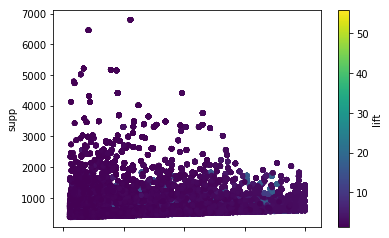

In [68]:
ax2 = df.plot.scatter(x='conf', y='supp', c='lift', colormap='viridis')

In [37]:
df.lift.min()

0.6100254885301615

## Itemset Frequenti


In [38]:
#supporto 2
itemsets = apriori(baskets, supp=1, zmin=3, target='a')

In [39]:
print('Number of itemsets:', len(itemsets))

itemsets[0]

Number of itemsets: 5759


(('AVENGER', 'SE', 'CHRYSLER'), 619)

In [40]:
itemsets.sort(key=lambda x: x[1],reverse=True)

In [41]:
itemsets

[(('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]', 'Age:[4, 6)'), 6798),
 (('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]', 'Covers'), 6653),
 (('AAAP:(3000.0, 6000.0]', 'Age:[4, 6)', 'Covers'), 6458),
 (('Age:[4, 6)', 'Odo:(60000, 80000]', 'Alloy'), 6392),
 (('AAAP:(3000.0, 6000.0]', 'Age:[4, 6)', 'Odo:(60000, 80000]'), 6222),
 (('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]', 'Odo:(60000, 80000]'),
  5936),
 (('AAAP:(3000.0, 6000.0]', 'Age:[4, 6)', 'Alloy'), 5794),
 (('WarrCost:(1200, 1800]', 'Odo:(60000, 80000]', 'Alloy'), 5641),
 (('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]', 'Alloy'), 5410),
 (('VehBCost:(5000.0, 7000.0]', 'Covers', 'Odo:(60000, 80000]'), 5373),
 (('AAAP:(3000.0, 6000.0]', 'Odo:(60000, 80000]', 'Alloy'), 5306),
 (('WarrCost:(700, 1200]', 'Odo:(60000, 80000]', 'Alloy'), 5266),
 (('AAAP:(6000.0, 8000.0]', 'Age:[2, 4)', 'Covers'), 5211),
 (('Odo:(80000, 100000]', 'WarrCost:(1200, 1800]', 'Alloy'), 5165),
 (('Age:[2, 4)', 'VehBCost:(5000.0, 

## how changes the number of patterns with target "all"

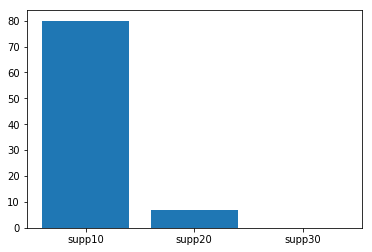

In [42]:
#rappresento graficamente come cambia il numero di pattern al cambiare del supporto

height = [80, 7, 0]
bars = ('supp10', 'supp20', 'supp30')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()



## Itemset Massimali

In [43]:
itemsets = apriori(baskets, supp=20, zmin=2, target='m')

In [44]:
print('Number of itemsets:', len(itemsets))

itemsets[1]

Number of itemsets: 7


(('VehBCost:(5000.0, 7000.0]', 'Covers'), 12122)

In [45]:
itemsets.sort(key=lambda x: x[1],reverse=True)

In [46]:
itemsets[:10]

[(('Odo:(60000, 80000]', 'Alloy'), 14168),
 (('Age:[4, 6)', 'Alloy'), 12878),
 (('AAAP:(3000.0, 6000.0]', 'Age:[4, 6)'), 12846),
 (('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]'), 12540),
 (('VehBCost:(5000.0, 7000.0]', 'Covers'), 12122),
 (('Covers', 'Odo:(60000, 80000]'), 11983),
 (('Age:[4, 6)', 'Odo:(60000, 80000]'), 11748)]

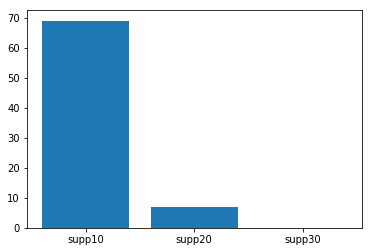

In [47]:
height = [69, 7, 0]
bars = ('supp10', 'supp20', 'supp30')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

##  Itemset Closed

In [48]:
itemsets = apriori(baskets, supp=20, zmin=3, target='c')

In [49]:
print('Number of itemsets:', len(itemsets))

Number of itemsets: 0


In [50]:
itemsets.sort(key=lambda x: x[1],reverse=True)

In [51]:
itemsets

[]

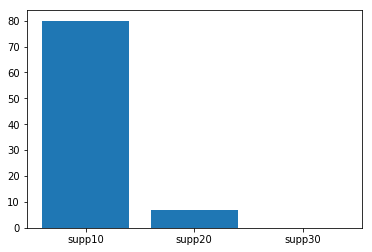

In [52]:
height = [80, 7, 0]
bars = ('supp10', 'supp20', 'supp30')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

## ASSOCIATION RULES 

In [53]:
rules = apriori(baskets, supp=10, zmin=2, target='r', conf=67, 
                report='ascl')

In [54]:
print('Number of rule:', len(rules))
rules[0]

Number of rule: 7


('GM',
 ('LS',),
 6303,
 0.1079576596327761,
 0.7689398560448945,
 2.273563484013224)

In [55]:
rules.sort(key=lambda x: x[4],reverse=True)

CODICE DA RIVEDERE

count = 1
Cyan = True
for r in rules:
    if(r[4]>0.8 and r[4]):
        if(Cyan):
            Cyan = False
            print (" \rowcolor{cyan!20} ",count, " & ",r[1]," & ", r[0], " & ", r[4], " & ", r[5],"\%\\")
        else:
            Cyan = True
            print (count, " & ",r[1]," & ", r[0], " & ", r[4], " & ", r[5],"\%\\")
        count += 1

In [56]:
count = 0
for r in rules:
    if r[5] > 0.67 and r[5]:
        print(r)
        count += 1
        if count == 10:
            break
            
# i primi formano l'association rule, quindi vuol dire che quando ho AUTO ho spesso anche (AMERICAN, goodbuy)
# il terzo elemento è il support dell'itemset
# il quarto elemento è il support relativo espresso come frazione
# il quinto è la confidence della rule
# il sesto è il lift value.

('GM', ('LS',), 6303, 0.1079576596327761, 0.7689398560448945, 2.273563484013224)
('Alloy', ('FORD',), 7536, 0.1290764593039189, 0.7674915979223954, 1.523916115259867)
('GM', ('WarrCost:(1800, 2600]',), 6239, 0.10686146889558783, 0.7363389590463826, 2.17717075787319)
('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)'), 6798, 0.11643600986571663, 0.710864791383457, 1.7729561271362193)
('CHRYSLER', ('Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 4411, 0.07555152096464784, 0.6896497811131957, 2.1491600117700997)
('Covers', ('Age:[2, 4)', 'VehBCost:(5000.0, 7000.0]'), 5148, 0.08817484242258153, 0.6878674505611972, 1.5012692323115)
('Alloy', ('Odo:(80000, 100000]', 'WarrCost:(1200, 1800]'), 5165, 0.08846601808714716, 0.6782665791201575, 1.346752685190834)


## CAMBIO LA CONFIDENZA


In [57]:
rules = apriori(baskets, supp=10, zmin=3, target='r', conf=65, 
                report='ascl')

In [58]:
print('Number of rule:', len(rules))

Number of rule: 4


In [59]:
rules.sort(key=lambda x: x[4],reverse=True)

In [60]:
count = 0
for r in rules:
    if r[5] > 0.65 and r[5]:
        print(r)
        count += 1
        if count == 10:
            break

('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)'), 6798, 0.11643600986571663, 0.710864791383457, 1.7729561271362193)
('CHRYSLER', ('Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 4411, 0.07555152096464784, 0.6896497811131957, 2.1491600117700997)
('Covers', ('Age:[2, 4)', 'VehBCost:(5000.0, 7000.0]'), 5148, 0.08817484242258153, 0.6878674505611972, 1.5012692323115)
('Alloy', ('Odo:(80000, 100000]', 'WarrCost:(1200, 1800]'), 5165, 0.08846601808714716, 0.6782665791201575, 1.346752685190834)


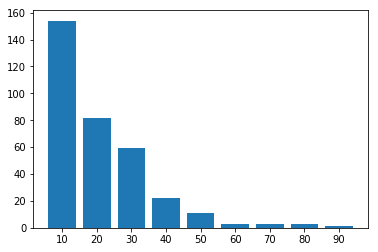

In [61]:
#Numero di regole prodotte all'aumentare del livello di confidenza

height = [154, 82, 59, 22, 11, 3, 3, 3, 1]
bars = ('10', '20', '30', '40', '50', '60', '70', '80', '90')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

DA RIVEDERE

#ScatterPlot con confidenza 40%

plt.scatter(support, lift, alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.show()


In [62]:
supports = [1, 2, 5, 10, 20]
results = {}
for support in supports:
        results[support] = apriori(records, supp=support, zmin=2, target=target) 

NameError: name 'records' is not defined

## dfcazzo bocciato ma per ora lo tengo

In [ ]:
#dfcazzo = df[df['BuyStatus'] == 'BadBuy']
#dfcazzo.head()

In [ ]:
#baskets2 = dfcazzo.values.tolist()

In [ ]:
#itemsets2 = apriori(baskets2, supp=20, zmin=3, target='a')
#print('Number of itemsets:', len(itemsets2))


In [ ]:
#itemsets2.sort(key=lambda x: x[1],reverse=True)
#itemsets2

('GoodBuy', ('Odo:(60000, 80000]', 'Alloy')

('GoodBuy', ('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]')